In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("..")
print("at directory:", os.getcwd())
sys.path.append("simulations")

at directory: /Users/wilka/git/research/human-dyna-web/figures
changing to root directory
at directory: /Users/wilka/git/research/human-dyna-web


In [3]:
# from analysis import craftax_model_data
import ipywidgets
from tqdm.notebook import tqdm
from IPython.display import display

from analysis import craftax_user_data
from analysis import craftax_analysis
from analysis import experiment_analysis
import nicewebrl
import matplotlib.pyplot as plt
import polars as pl


%matplotlib inline

Loading textures from cache.
Textures successfully loaded from cache.
Loading textures from cache.
/Users/wilka/miniforge3/envs/preplay/lib/python3.10/site-packages/craftax/craftax/assets/fullmap_texture_cache_48.pbz2
Textures successfully loaded from cache.
Compiling environment reset and step functions.
	reset time: 10.740028858184814
	step time: 13.140943050384521
Compiling multi-render function.
	time: 3.014688014984131


A* Iterations: 0it [00:00, ?it/s]

A* Iterations: 0it [00:00, ?it/s]

A* Iterations: 0it [00:00, ?it/s]

A* Iterations: 0it [00:00, ?it/s]

# Simulation data

In [17]:
# from analysis import craftax_download_data
from analysis import craftax_model_data

import data_configs as configs


def get_dir(model_name):
  return f"{configs.CRAFTAX_MODEL_DIR}/final/{model_name}/seed=*"
  # return f"{configs.CRAFTAX_MODEL_DIR}/final/{model_name}/seed=1"


cache_dir = f"{configs.CRAFTAX_MODEL_DIR}/craftax_cache/model_data_cache"


model_df = craftax_model_data.get_model_data(
  qlearning_path=get_dir("qlearning"),
  sf_path=get_dir("sf"),
  dyna_path=get_dir("dyna"),
  preplay_path=get_dir("preplay"),
  cache_dir=cache_dir,
  overwrite_episodes=False,
  overwrite_df=True,
)

  0%|          | 0/10 [00:00<?, ?it/s]

qlearning: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/qlearning/seed=6/analysis//qlearning_timesteps.pickle in 0.2615039348602295 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/qlearning/seed=6/analysis//qlearning_df.csv
qlearning: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/qlearning/seed=1/analysis//qlearning_timesteps.pickle in 0.1583716869354248 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/qlearning/seed=1/analysis//qlearning_df.csv
qlearning: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/qlearning/seed=8/analysis//qlearning_timesteps.pickle in 0.24197983741760254 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/qlearning/seed=8/analysis//qlearning_df.csv
qlearn

  0%|          | 0/6 [00:00<?, ?it/s]

usfa: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/sf/seed=8/analysis//usfa_timesteps.pickle in 0.3311769962310791 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/sf/seed=8/analysis//usfa_df.csv
usfa: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/sf/seed=10/analysis//usfa_timesteps.pickle in 0.27147912979125977 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/sf/seed=10/analysis//usfa_df.csv
usfa: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/sf/seed=9/analysis//usfa_timesteps.pickle in 0.33961915969848633 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/sf/seed=9/analysis//usfa_df.csv
usfa: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/

  0%|          | 0/10 [00:00<?, ?it/s]

dyna: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/dyna/seed=6/analysis//dyna_timesteps.pickle in 0.37660908699035645 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/dyna/seed=6/analysis//dyna_df.csv
dyna: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/dyna/seed=1/analysis//dyna_timesteps.pickle in 0.32961392402648926 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/dyna/seed=1/analysis//dyna_df.csv
dyna: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/dyna/seed=8/analysis//dyna_timesteps.pickle in 0.3063008785247803 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/dyna/seed=8/analysis//dyna_df.csv
dyna: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_m

  0%|          | 0/9 [00:00<?, ?it/s]

preplay: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/preplay/seed=1/analysis//preplay_timesteps.pickle in 0.2596428394317627 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/preplay/seed=1/analysis//preplay_df.csv
preplay: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/preplay/seed=8/analysis//preplay_timesteps.pickle in 0.4876248836517334 seconds
No successful training episodes for ('paths_2_training', 'paths_2_eval1')
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/preplay/seed=8/analysis//preplay_df.csv
preplay: Loaded 8 episodes from /Users/wilka/git/research/preplay_results/craftax_model_data/final/preplay/seed=10/analysis//preplay_timesteps.pickle in 0.26207613945007324 seconds
Created new DataFrame with 8 rows: /Users/wilka/git/research/preplay_results/craftax_model_data/final/p

In [29]:
# print(model_df.filter(eval=False)['success'].mean())
model_df.filter(eval=False).group_by("algo").agg(
  success=pl.col("success").cast(pl.Float64).mean()
)
# model_df.head()

shape: (4, 2)
┌───────────┬──────────┐
│ algo      ┆ success  │
│ ---       ┆ ---      │
│ str       ┆ f64      │
╞═══════════╪══════════╡
│ usfa      ┆ 1.0      │
│ preplay   ┆ 0.972222 │
│ qlearning ┆ 1.0      │
│ dyna      ┆ 1.0      │
└───────────┴──────────┘

# Human data

In [5]:
# ON COMPUTER
import data_configs

USER_RESULTS_DIR = os.path.join(data_configs.CRAFTAX_USER_DIR, "user_data/exps")

In [6]:
from glob import glob

files = f"{USER_RESULTS_DIR}/*final*v2*.json"

files = list(set(glob(files)))
files[:1], len(files)

(['/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2950025390_worker=A1QTXVVD0FSLBI_name=craftax_final-v2-paths-r0-m0_debug=0.json'],
 262)

In [12]:
import craftax_experiment_structure as experiment
import asyncio

# %debug
user_df, failed_files = await craftax_user_data.get_human_data(
  files,
  overwrite_episode_data=False,
  overwrite_episode_info=True,
  debug=False,
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   23.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   28.8s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   34.1s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   39.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   45.2s


Loading textures from cache.
Textures successfully loaded from cache.
Loading textures from cache.
/Users/wilka/miniforge3/envs/preplay/lib/python3.10/site-packages/craftax/craftax/assets/fullmap_texture_cache_48.pbz2
Textures successfully loaded from cache.
Compiling environment reset and step functions.
	reset time: 11.910854816436768
	step time: 14.492408037185669
Compiling multi-render function.
	time: 3.0042691230773926
A* Iterations: 0it [00:00, ?it/s]
A* Iterations: 0it [00:00, ?it/s]
A* Iterations: 0it [00:00, ?it/s]
A* Iterations: 0it [00:00, ?it/s]
0/26: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2950025390_worker=A1QTXVVD0FSLBI_name=craftax_final-v2-paths-r0-m0_debug=0.json in 0.33 seconds
2/26: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2509331756_worker=A1G5PO0BLQPBJ7_name=craftax_final-v2-paths-r0-m0_debug=0.json in 0.01 seconds
No test episodes for ('paths_0_training', 'paths_0_

[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   51.8s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   59.6s


Loading textures from cache.
Textures successfully loaded from cache.
Loading textures from cache.
/Users/wilka/miniforge3/envs/preplay/lib/python3.10/site-packages/craftax/craftax/assets/fullmap_texture_cache_48.pbz2
Textures successfully loaded from cache.
Compiling environment reset and step functions.
	reset time: 12.052011966705322
	step time: 14.343230962753296
Compiling multi-render function.
	time: 3.020024061203003
A* Iterations: 0it [00:00, ?it/s]
A* Iterations: 0it [00:00, ?it/s]
A* Iterations: 0it [00:00, ?it/s]
A* Iterations: 0it [00:00, ?it/s]
No test episodes for ('paths_0_training', 'paths_0_eval1')
No test episodes for ('paths_1_training', 'paths_1_eval1')
No test episodes for ('paths_2_training', 'paths_2_eval1')
No test episodes for ('paths_3_training', 'paths_3_eval1')
No test episodes for ('paths_0_training', 'paths_0_eval1')
No test episodes for ('paths_1_training', 'paths_1_eval1')
No test episodes for ('paths_2_training', 'paths_2_eval1')
No test episodes for ('

[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.6min


30/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=3776078953_worker=A3NY4B53Z2K6GP_name=craftax_final-v2-paths-r0-m0_debug=0.json in 0.74 seconds
Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=502252650_worker=A1G9TM403JVKWP_name=craftax_final-v2-paths-r1-m0_debug=0_episode_data.bytes
31/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=502252650_worker=A1G9TM403JVKWP_name=craftax_final-v2-paths-r1-m0_debug=0.json in 0.90 seconds
Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=2525110812_worker=A2VGV8TRMVI2MA_name=craftax_final-v2-paths-r0-m0_debug=0_episode_data.bytes
32/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2525110812_worker=A2VGV8TRMVI2MA_name=craftax_final-v2-paths-r0-m0_debug=0.json in 2.18 seconds
Loaded episode data 

[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  1.8min


53/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=523432651_worker=A34V7HUH38XVGT_name=craftax_final-v2-paths-r0-m0_debug=0.json in 1.14 seconds
Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=3870560850_worker=A2JMEQ3KQFQCRM_name=craftax_final-v2-paths-r1-m0_debug=0_episode_data.bytes
55/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=3870560850_worker=A2JMEQ3KQFQCRM_name=craftax_final-v2-paths-r1-m0_debug=0.json in 0.76 seconds
Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=894637004_worker=A1OJAMICJSLKFW_name=craftax_final-v2-paths-r1-m0_debug=0_episode_data.bytes
57/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=894637004_worker=A1OJAMICJSLKFW_name=craftax_final-v2-paths-r1-m0_debug=0.json in 1.01 seconds
Loaded episode data f

/Users/wilka/miniforge3/envs/preplay/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=2)]: Done 177 tasks      | elapsed:  2.0min


Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=2029352181_worker=A2ER0EVZ7E1Z8G_name=craftax_final-v2-paths-r0-m0_debug=0_episode_data.bytes
113/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2029352181_worker=A2ER0EVZ7E1Z8G_name=craftax_final-v2-paths-r0-m0_debug=0.json in 0.80 seconds
Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=18885382_worker=A1OB9IM0RVZABO_name=craftax_final-v2-paths-r1-m0_debug=0_episode_data.bytes
115/262: Processed /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=18885382_worker=A1OB9IM0RVZABO_name=craftax_final-v2-paths-r1-m0_debug=0.json in 0.91 seconds
Loaded episode data from /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps//user=256468843_worker=A18UCBCCBKS6NY_name=craftax_final-v2-paths-r1-m0_debug=0_episode_data.bytes
117/262: Proces

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:  3.9min
Failed to unpack record in /Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=405518838_worker=A3UQ5DF8VVD975_name=craftax_final-v2-paths-r1-m0_debug=0.json: unpack(b) received extra data.
[Parallel(n_jobs=2)]: Done 238 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 262 out of 262 | elapsed:  4.5min finished


In [13]:
failed_files

[('/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2509331756_worker=A1G5PO0BLQPBJ7_name=craftax_final-v2-paths-r0-m0_debug=0.json',
  None),
 ('/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=2694913657_worker=A3RT3B73TLJBO1_name=craftax_final-v2-paths-r0-m0_debug=0.json',
  AttributeError("'EnvState' object has no attribute 'step_num'")),
 ('/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=801556838_worker=A3Q22AX7PD1QMR_name=craftax_final-v2-paths-r0-m0_debug=0.json',
  None),
 ('/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=1474707849_worker=AUO3MUHZA2FWD_name=craftax_final-v2-paths-r1-m0_debug=0.json',
  None),
 ('/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/exps/user=3845548008_worker=AMHLQZ1GM06P7_name=craftax_final-v2-paths-r0-m0_debug=0.json',
  None),
 ('/Users/wilka/git/research/preplay_results/craftax_user_data/user_data/e

In [15]:
len(user_df["user_id"].unique())

245

# Analysis

In [11]:
# model_df.filter(eval=True).group_by("algo").agg(pl.col("overlap"))

## Path reuse

Num initial users:  245
Num initial users after success filter:  245
Adding 100 users for tell_reuse=1
Adding 100 users for tell_reuse=0
Num initial users after first 100 filter:  200
Plotting qlearning with color #CC79A7
Plotting usfa with color #9B80E6
Plotting dyna with color #666666
Plotting preplay with color (0.8352941176470589, 0.3686274509803922, 0.0)


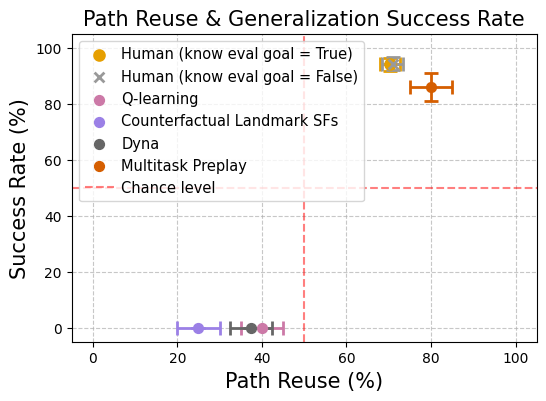

In [62]:
# sub_df = craftax_analysis.get_path_reuse_df(user_df, **filter)
craftax_analysis.path_reuse_manipulation_analysis(
  sub_df=user_df,
  model_df=model_df,
  # reuse_column="efficient_reuse_1.75",
  # save_dir=os.path.join(DATA_DIR, "analysis"),
)
plt.show()

# Which maps was reuse = 0

Adding 100 users for tell_reuse=1
Adding 100 users for tell_reuse=0
Saved plot to /tmp/reuse_analysis/non_reuse_frequency_by_seed.pdf


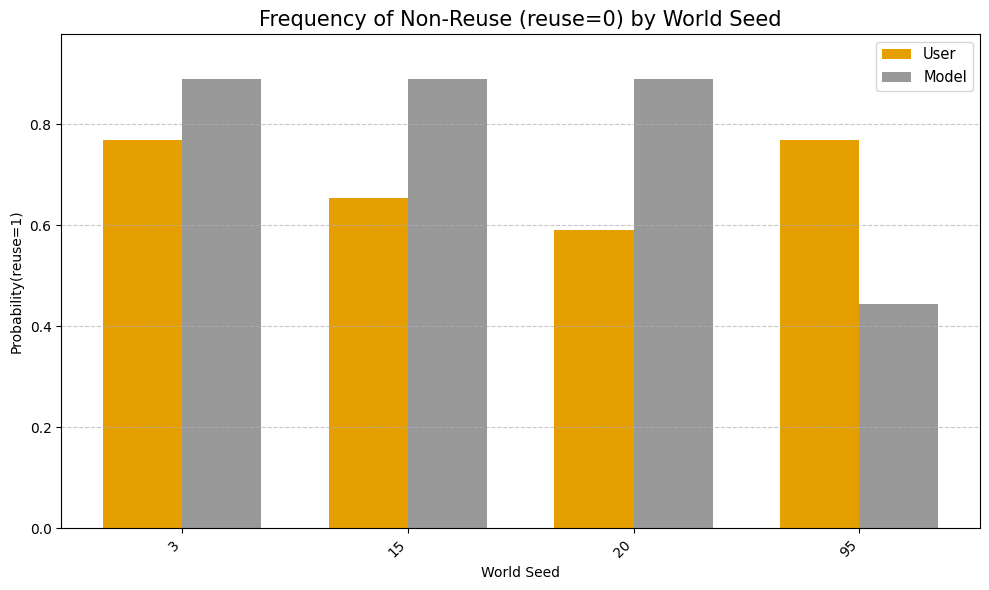

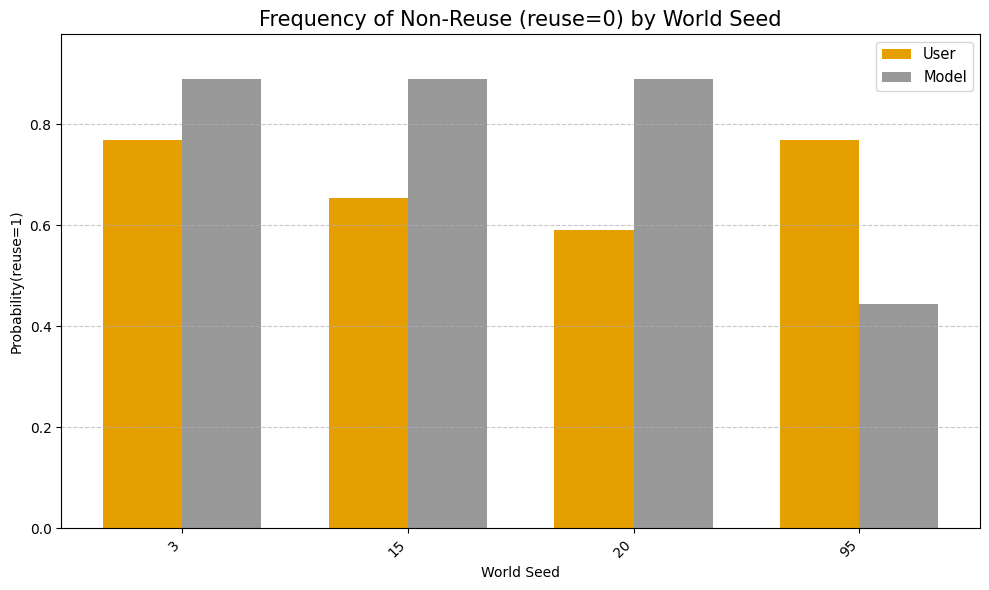

In [26]:
fig, ax = craftax_analysis.plot_non_reuse_frequency_by_world_seed(
  user_df=user_df,
  model_df=model_df,
  # reuse_column="efficient_reuse_2",
  save_dir="/tmp/reuse_analysis",
)
# plt.show()

# Individual analysis

In [36]:
filter = dict(tell_reuse=0)
sub_df = user_df.filter(**filter)
users = sub_df["user_id"].unique()
users

In [37]:
users = sub_df["user_id"].unique()
users

shape: (17,)
Series: 'user_id' [i64]
[
	10434196
	122928105
	818906834
	2349435691
	2540827707
	…
	3638567733
	3651975810
	3817231829
	4145025209
	4233642709
]






10434196


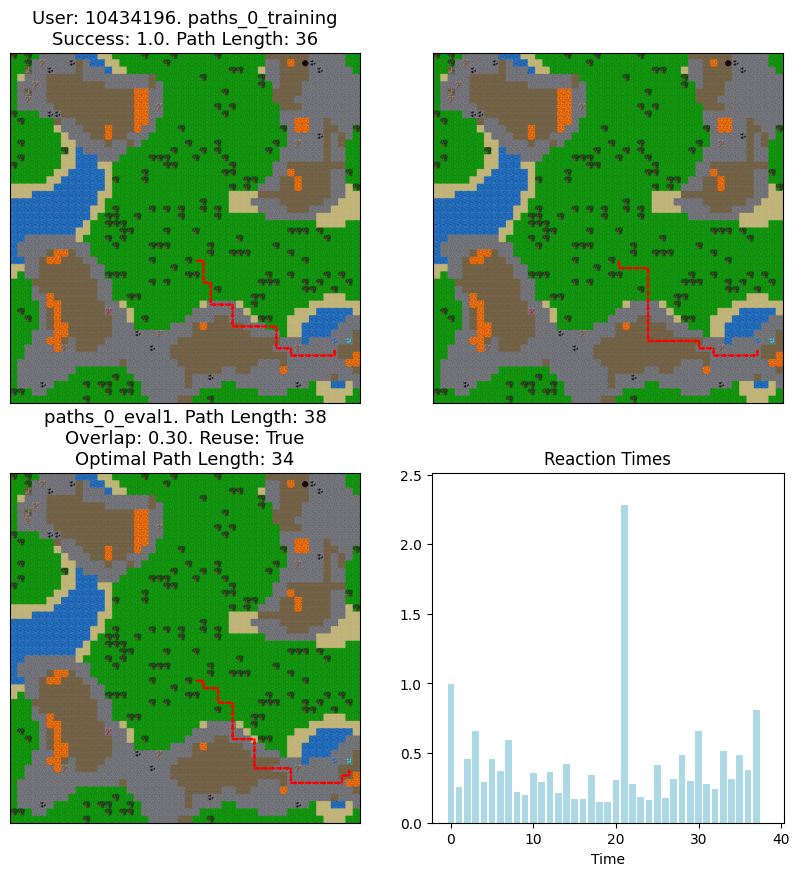

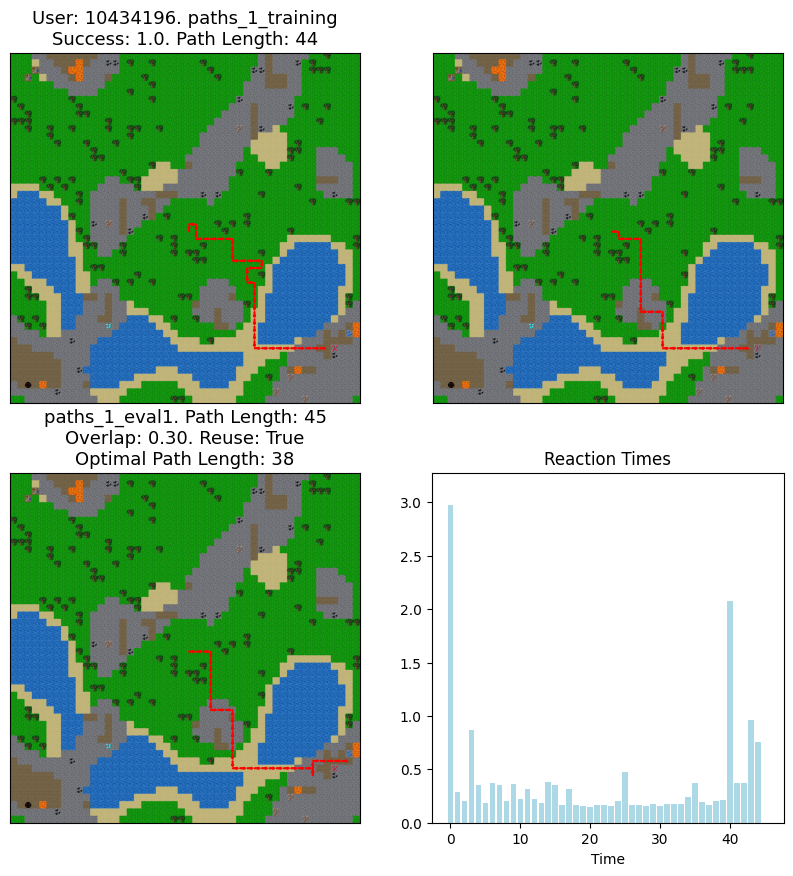

No test episodes for maze: paths_2_eval1


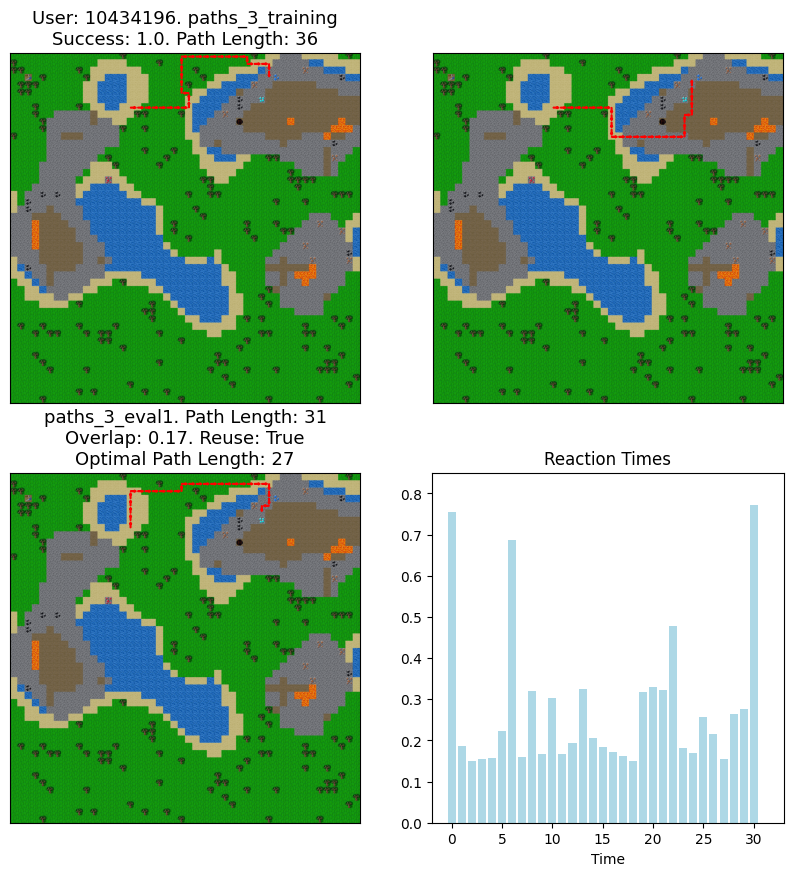






122928105


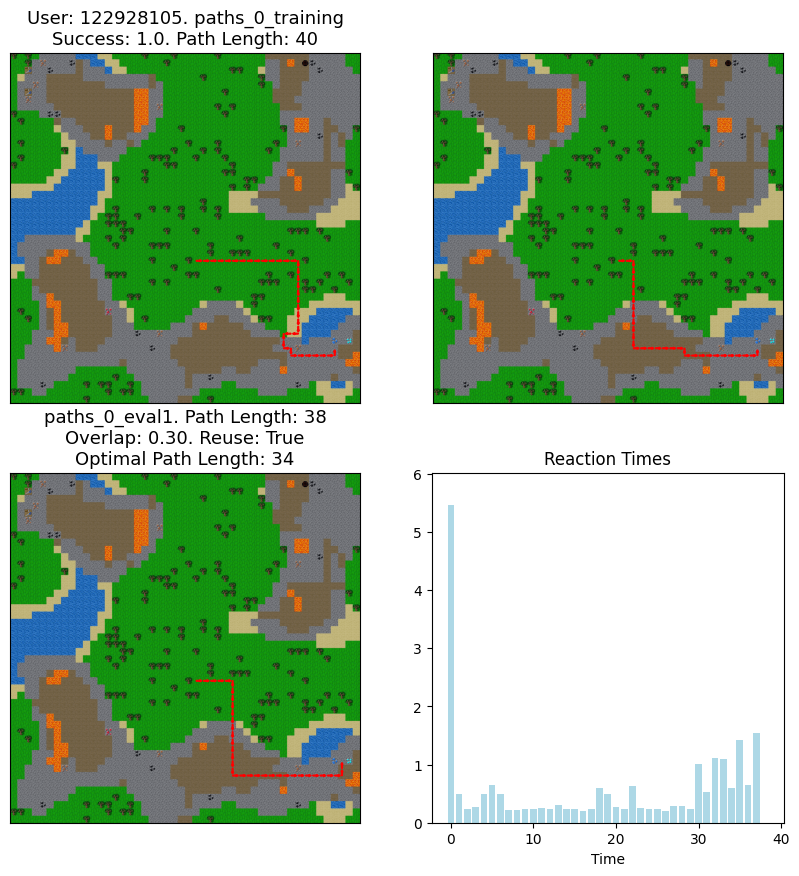

No test episodes for maze: paths_1_eval1
No test episodes for maze: paths_2_eval1


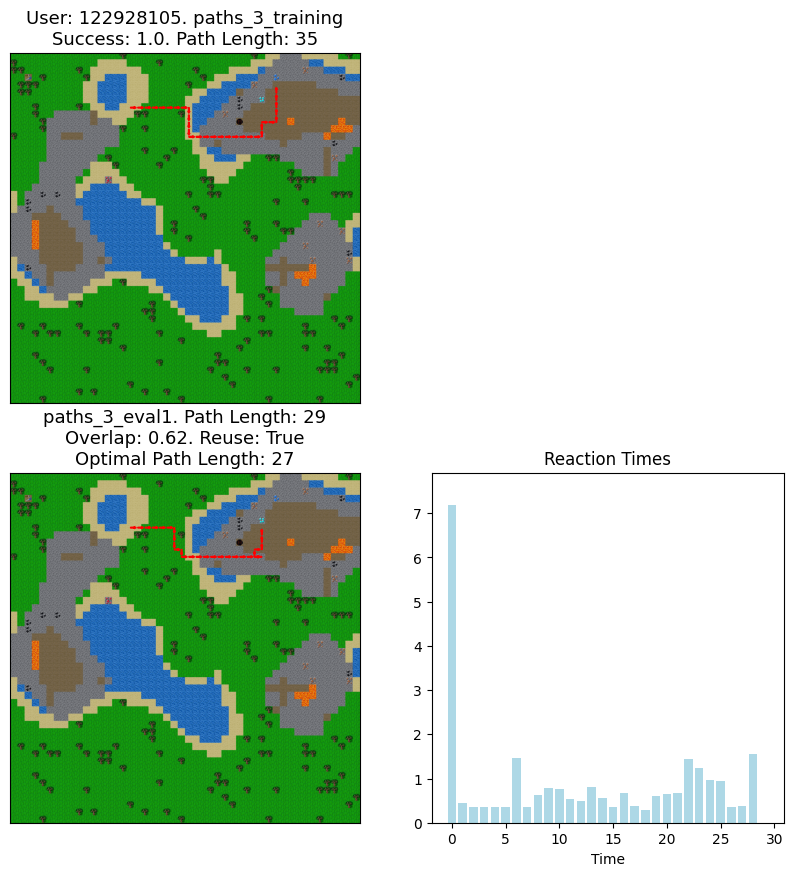






818906834


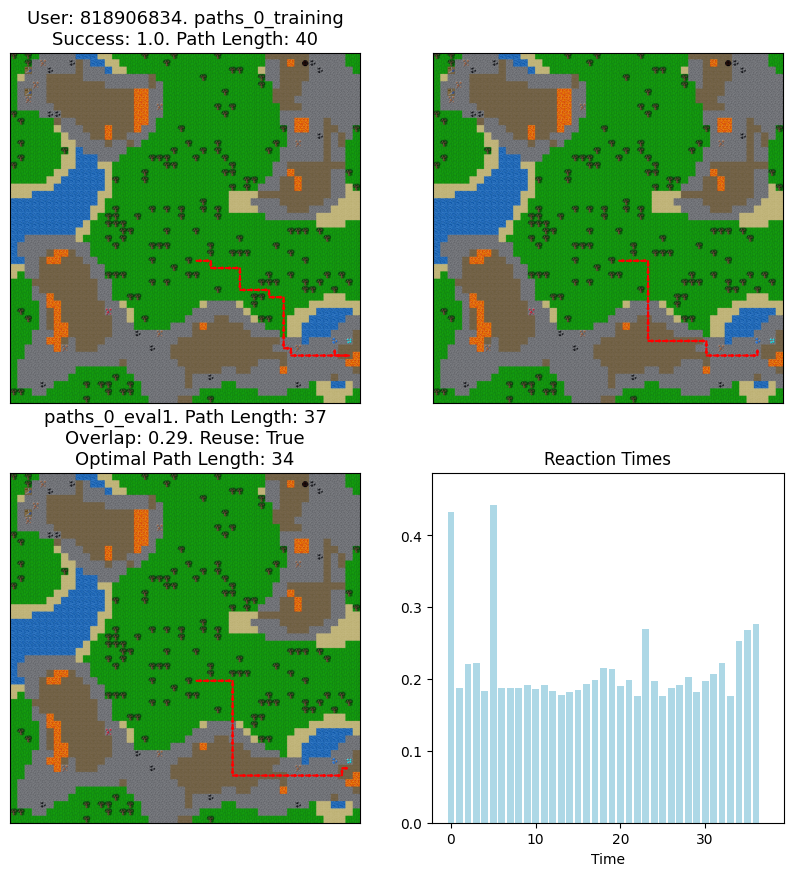

No test episodes for maze: paths_1_eval1


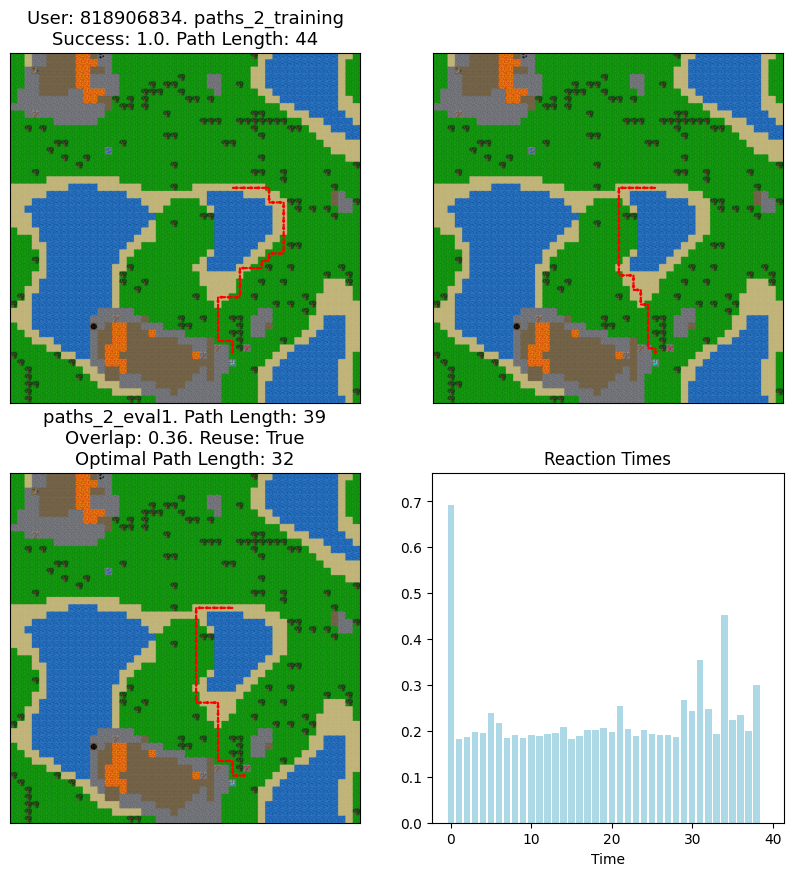

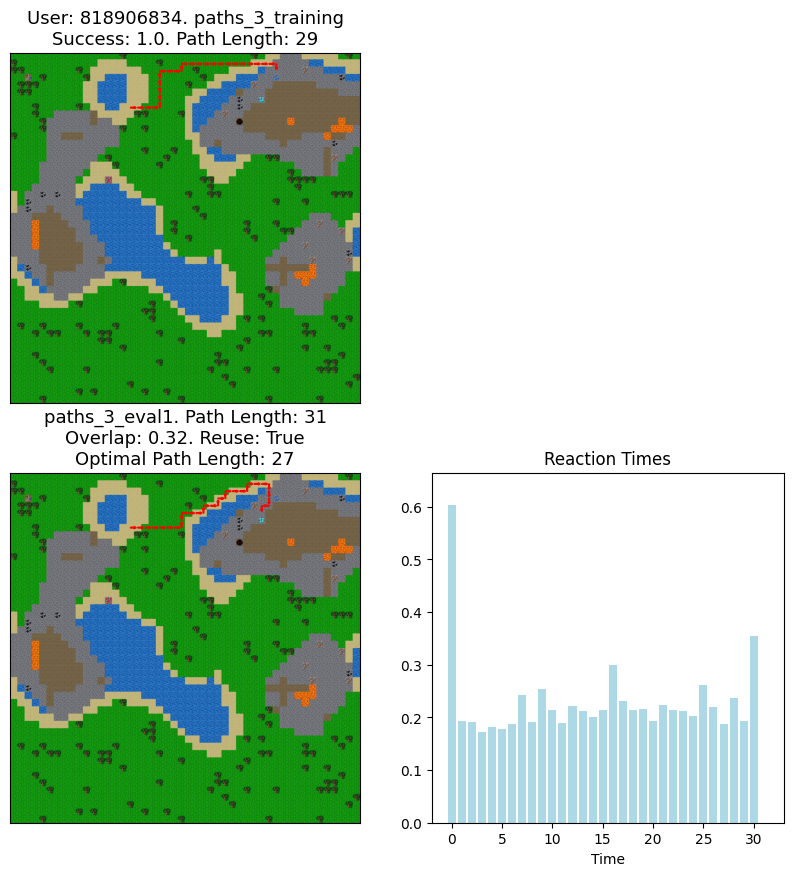






2349435691
No test episodes for maze: paths_0_eval1
No test episodes for maze: paths_1_eval1
No test episodes for maze: paths_2_eval1
No test episodes for maze: paths_3_eval1





2540827707
No test episodes for maze: paths_0_eval1


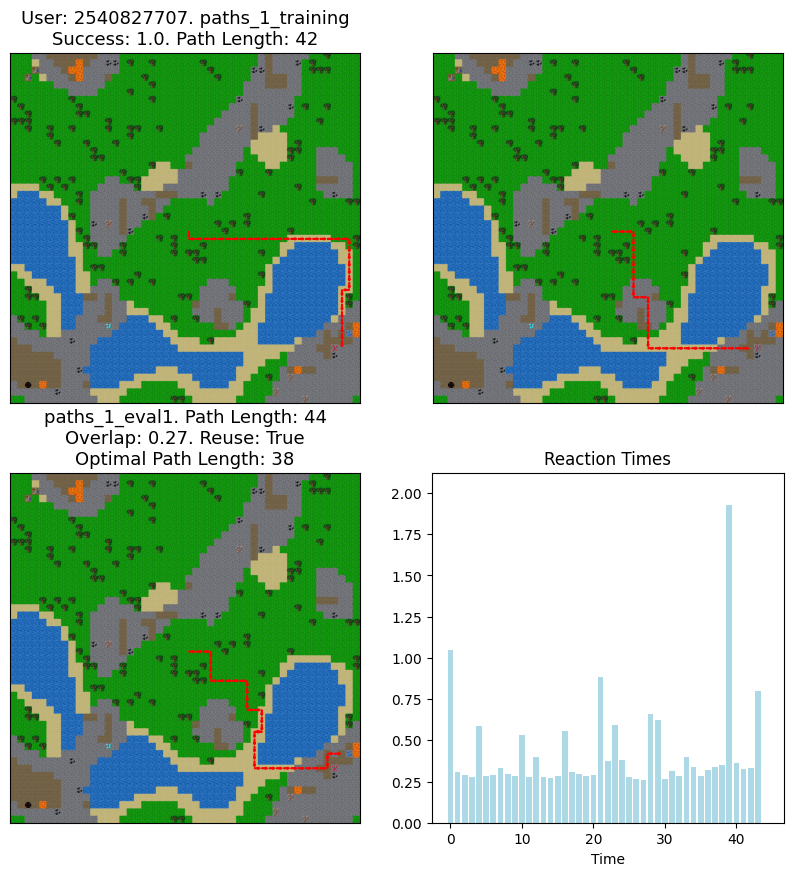

No test episodes for maze: paths_2_eval1


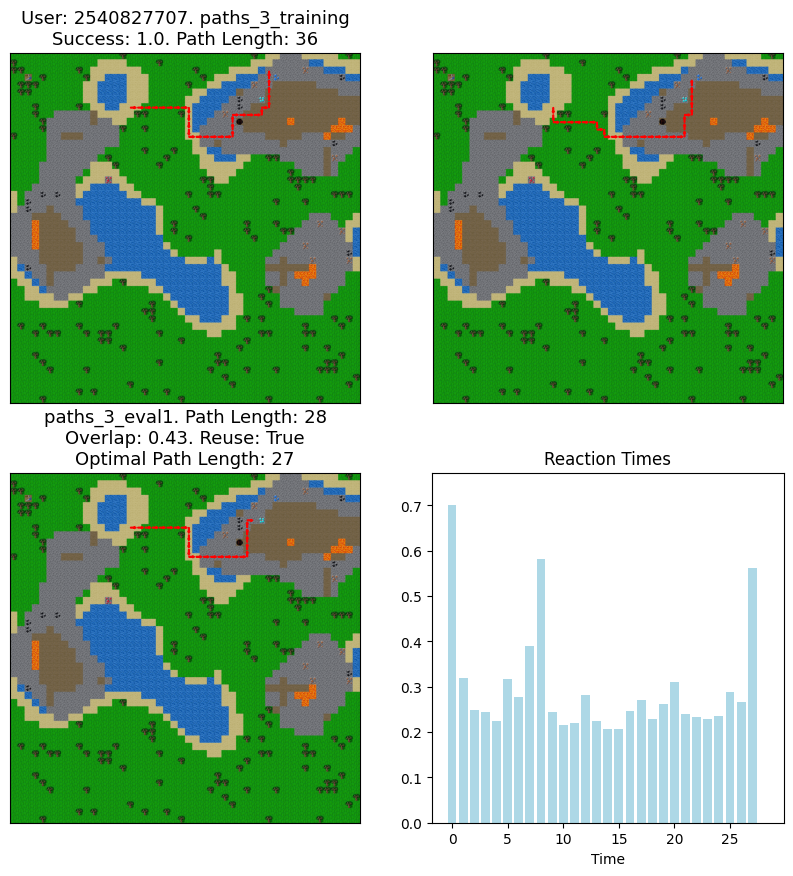

In [38]:
from IPython.display import HTML, display, Markdown

# Then you can display Markdown like this:
# suboptimal_df = sub_df.filter(suboptimal_path=True)
for user_id in users[:5]:
  # get df where user
  print("\n" * 4)
  print("=" * 100)
  print(user_id)
  print("=" * 100)
  craftax_analysis.visualize_user_path_reuse(
    sub_df, user_id, **{"efficient_reuse_1.25": True}
  )
  plt.show()






10434196
No test episodes for maze: paths_0_eval1
No test episodes for maze: paths_1_eval1
No test episodes for maze: paths_2_eval1
No test episodes for maze: paths_3_eval1





122928105
No test episodes for maze: paths_0_eval1
No test episodes for maze: paths_1_eval1
No test episodes for maze: paths_2_eval1
No test episodes for maze: paths_3_eval1





818906834
No test episodes for maze: paths_0_eval1
No test episodes for maze: paths_1_eval1
No test episodes for maze: paths_2_eval1
No test episodes for maze: paths_3_eval1





2349435691
No test episodes for maze: paths_0_eval1
No test episodes for maze: paths_1_eval1
No test episodes for maze: paths_2_eval1
No test episodes for maze: paths_3_eval1





2540827707
No test episodes for maze: paths_0_eval1
No test episodes for maze: paths_1_eval1


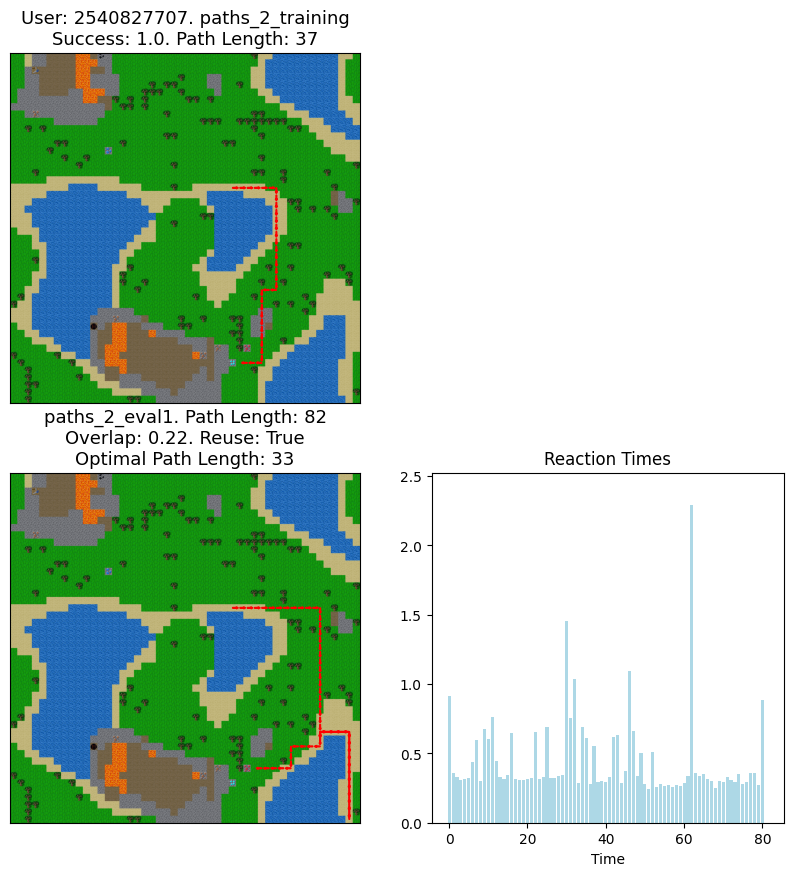

No test episodes for maze: paths_3_eval1


In [32]:
from IPython.display import HTML, display, Markdown

# Then you can display Markdown like this:
# suboptimal_df = sub_df.filter(suboptimal_path=True)
for user_id in users[:5]:
  # get df where user
  print("\n" * 4)
  print("=" * 100)
  print(user_id)
  print("=" * 100)
  craftax_analysis.visualize_user_path_reuse(
    sub_df, user_id, suboptimal_path=True, reuse=1
  )
  plt.show()